### load the data

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [2]:
df = pd.read_csv('crop_Recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### preprocess the data 

In [9]:
encoder = LabelEncoder()

In [11]:
df['label'] = encoder.fit_transform(df['label'])

In [13]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [18]:
X = df.drop('label', axis=1).copy()
y = df['label']

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=101, test_size=0.3)

### build the model and evaluate it

In [24]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())])

In [25]:
pipe.fit(Xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', RandomForestClassifier())])

In [32]:
prediction = pipe.predict(Xtest)

In [34]:
print(classification_report(prediction, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        41
           8       1.00      0.93      0.96        29
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        34
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        28
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        29
          17       1.00    

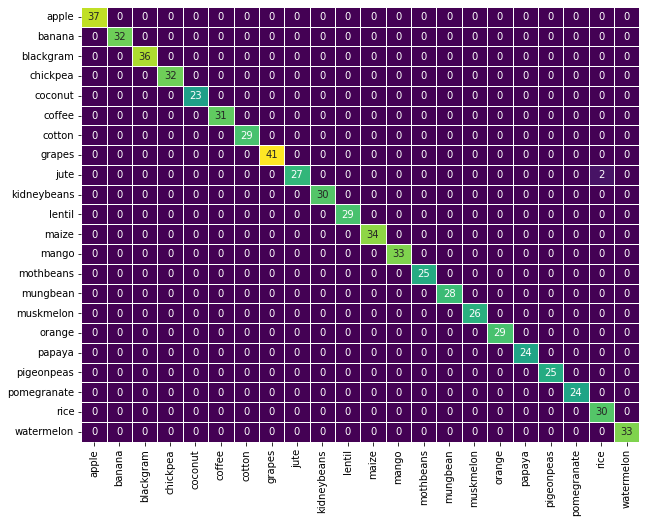

In [47]:
sns.heatmap(confusion_matrix(prediction, ytest), cmap='viridis', annot=True, cbar=False, linewidth=0.5, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
fig = plt.gcf()
fig.set_size_inches(10,8)

### recommend crop 

In [174]:
Pred_prob = pd.DataFrame(pipe.predict_proba(X))
Pred_prob.columns=encoder.classes_
Pred_prob.head()

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.02,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.98,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.99,0.0
3,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.02,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.97,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.00,0.0


In [140]:
def recommend_crop(X):
    crop = encoder.classes_[np.argmax(pipe.predict_proba(X), axis=1)]
    return crop

In [167]:
recommend_crop(Xtest[:1])

array(['mango'], dtype=object)

### save the model

In [168]:
with open('crop_recommendation_model', 'wb') as file:
    pickle.dump(pipe, file)

In [177]:
with open('encoder', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)